In [26]:
from prody import *

In [27]:
from pylab import *

In [28]:
from prody import calcDynamicCouplingIndex

In [29]:
DmbA = parsePDB('2qvb'  , chain='A')

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> 2qvb downloaded (2qvb.pdb.gz)
@> PDB download via FTP completed (1 downloaded, 0 failed).
@> 2669 atoms and 1 coordinate set(s) were parsed in 0.21s.
@> Secondary structures were assigned to 210 residues.


In [30]:
gnm = GNM('DmbA')
selection = DmbA.select('resnum 1 to 297')
DmbA_ca = selection.select('name CA')

In [31]:
gnm.buildKirchhoff(DmbA_ca)

@> Kirchhoff was built in 0.04s.


In [32]:
gnm.calcModes(n_modes='all')

@> 293 modes were calculated in 0.16s.


In [33]:
atoms = DmbA_ca

In [34]:
catalytic_residues = DmbA_ca.select('resnum 109 133 273')


In [35]:
select = 'all'

In [36]:
func_sel = catalytic_residues 

In [37]:
norm =True

In [38]:
dci = calcDynamicCouplingIndex(gnm, atoms, select, func_sel)

/home/zahra/.local/lib/python3.10/site-packages/prody/dynamics/perturb.py:267: RuntimeWarning: divide by zero encountered in divide
  return numerator/denominator


In [39]:
print(dci)

[-8.56473218e+13  3.56863249e+14  1.64623661e+14  3.24788988e+14
  1.84206357e+14  1.67182468e+14  2.03006807e+14  2.30959405e+14
  3.26718024e+14  7.19021258e+14  2.98550856e+15 -2.25231329e+15
 -1.52105058e+15 -1.31844236e+15 -1.02652706e+15 -8.65422388e+14
 -1.03401834e+15 -2.57396464e+15 -1.13935074e+16  1.45643816e+15
  7.52099120e+14  3.11748267e+14  2.68269836e+14  2.12666448e+14
  2.31184274e+14  2.52531685e+14  2.76140425e+14  2.75023091e+14
  2.90863695e+14  1.80534236e+14  1.67167224e+14 -3.94010747e+13
 -4.73689133e+14 -7.33937239e+14 -3.82773024e+15  9.25899664e+14
  3.74389102e+14 -2.96318160e+14  3.64210765e+14  2.23633888e+14
  1.65690740e+14 -1.21859238e+14 -4.68981766e+13  5.90028275e+13
 -1.81159468e+13 -2.42333439e+13  9.07727926e+13  9.71568269e+13
  5.80978142e+13  1.17481091e+14  1.65119465e+14  1.80224777e+14
  1.92043002e+14  2.19349335e+14  2.28112449e+14  1.97095740e+14
  2.31334380e+14  1.83838410e+14  5.28178194e+14  7.74393179e+14
 -3.62577527e+15 -1.38495

In [40]:
absolute_dci = abs(dci)

print(absolute_dci)


[8.56473218e+13 3.56863249e+14 1.64623661e+14 3.24788988e+14
 1.84206357e+14 1.67182468e+14 2.03006807e+14 2.30959405e+14
 3.26718024e+14 7.19021258e+14 2.98550856e+15 2.25231329e+15
 1.52105058e+15 1.31844236e+15 1.02652706e+15 8.65422388e+14
 1.03401834e+15 2.57396464e+15 1.13935074e+16 1.45643816e+15
 7.52099120e+14 3.11748267e+14 2.68269836e+14 2.12666448e+14
 2.31184274e+14 2.52531685e+14 2.76140425e+14 2.75023091e+14
 2.90863695e+14 1.80534236e+14 1.67167224e+14 3.94010747e+13
 4.73689133e+14 7.33937239e+14 3.82773024e+15 9.25899664e+14
 3.74389102e+14 2.96318160e+14 3.64210765e+14 2.23633888e+14
 1.65690740e+14 1.21859238e+14 4.68981766e+13 5.90028275e+13
 1.81159468e+13 2.42333439e+13 9.07727926e+13 9.71568269e+13
 5.80978142e+13 1.17481091e+14 1.65119465e+14 1.80224777e+14
 1.92043002e+14 2.19349335e+14 2.28112449e+14 1.97095740e+14
 2.31334380e+14 1.83838410e+14 5.28178194e+14 7.74393179e+14
 3.62577527e+15 1.38495660e+15 7.42419972e+14 9.30251452e+15
 1.05880567e+15 2.216047

In [ ]:
import numpy as np

np.save('absolute_dci.npy', absolute_dci)
loaded_array = np.load('absolute_dci.npy')
print(loaded_array)

In [41]:
dci_cutoff = np.percentile(absolute_dci, 100) 
 
dci_residues = [residue for residue, value in zip(DmbA_ca.getResnames(), absolute_dci)if value < dci_cutoff]

/home/zahra/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [42]:
dci_cutoff = np.percentile(absolute_dci, 100) 
 
dci_residues = [residue for residue, value in zip(DmbA_ca.getResnames(), absolute_dci)if value < dci_cutoff]

resnames_and_nums = list(zip(DmbA_ca.getResnames(), DmbA_ca.getResnums()))

dci_residues = [(resname, resnum) for (resname, resnum), value in zip(resnames_and_nums, absolute_dci) if value < dci_cutoff]

In [43]:
with open('dci.npy', 'wb')as f:
    ...:     np.save(f, absolute_dci)

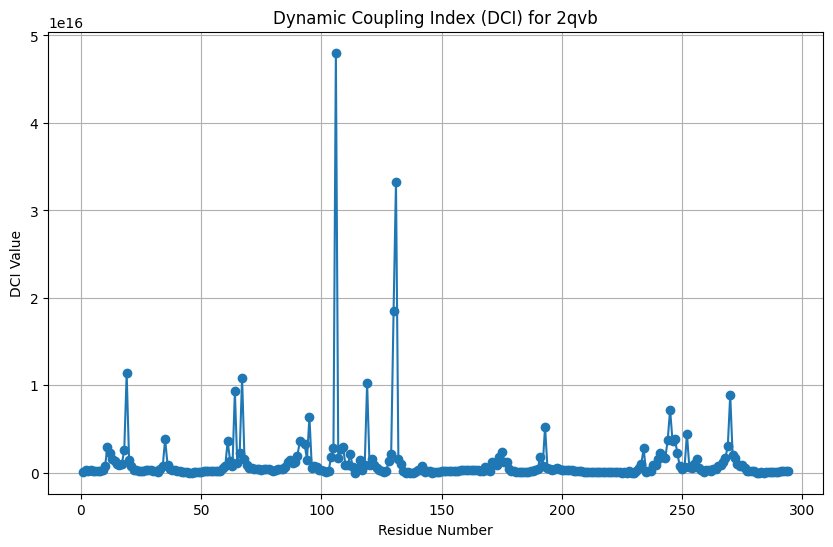

In [44]:
import numpy as np
    ...: import matplotlib.pyplot as plt
    ...: 
    ...:
    ...: dci_values = np.load('dci.npy')
    ...: 
  
    ...: residues = np.arange(1, len(dci_values) + 1)
    ...: 
    ...: 
    ...: plt.figure(figsize=(10, 6))
    ...: plt.plot(residues, dci_values, marker='o')
    ...: plt.xlabel('Residue Number')
    ...: plt.ylabel('DCI Value')
    ...: plt.title('Dynamic Coupling Index (DCI) for 2qvb')
    ...: plt.grid(True)
    ...: plt.show()

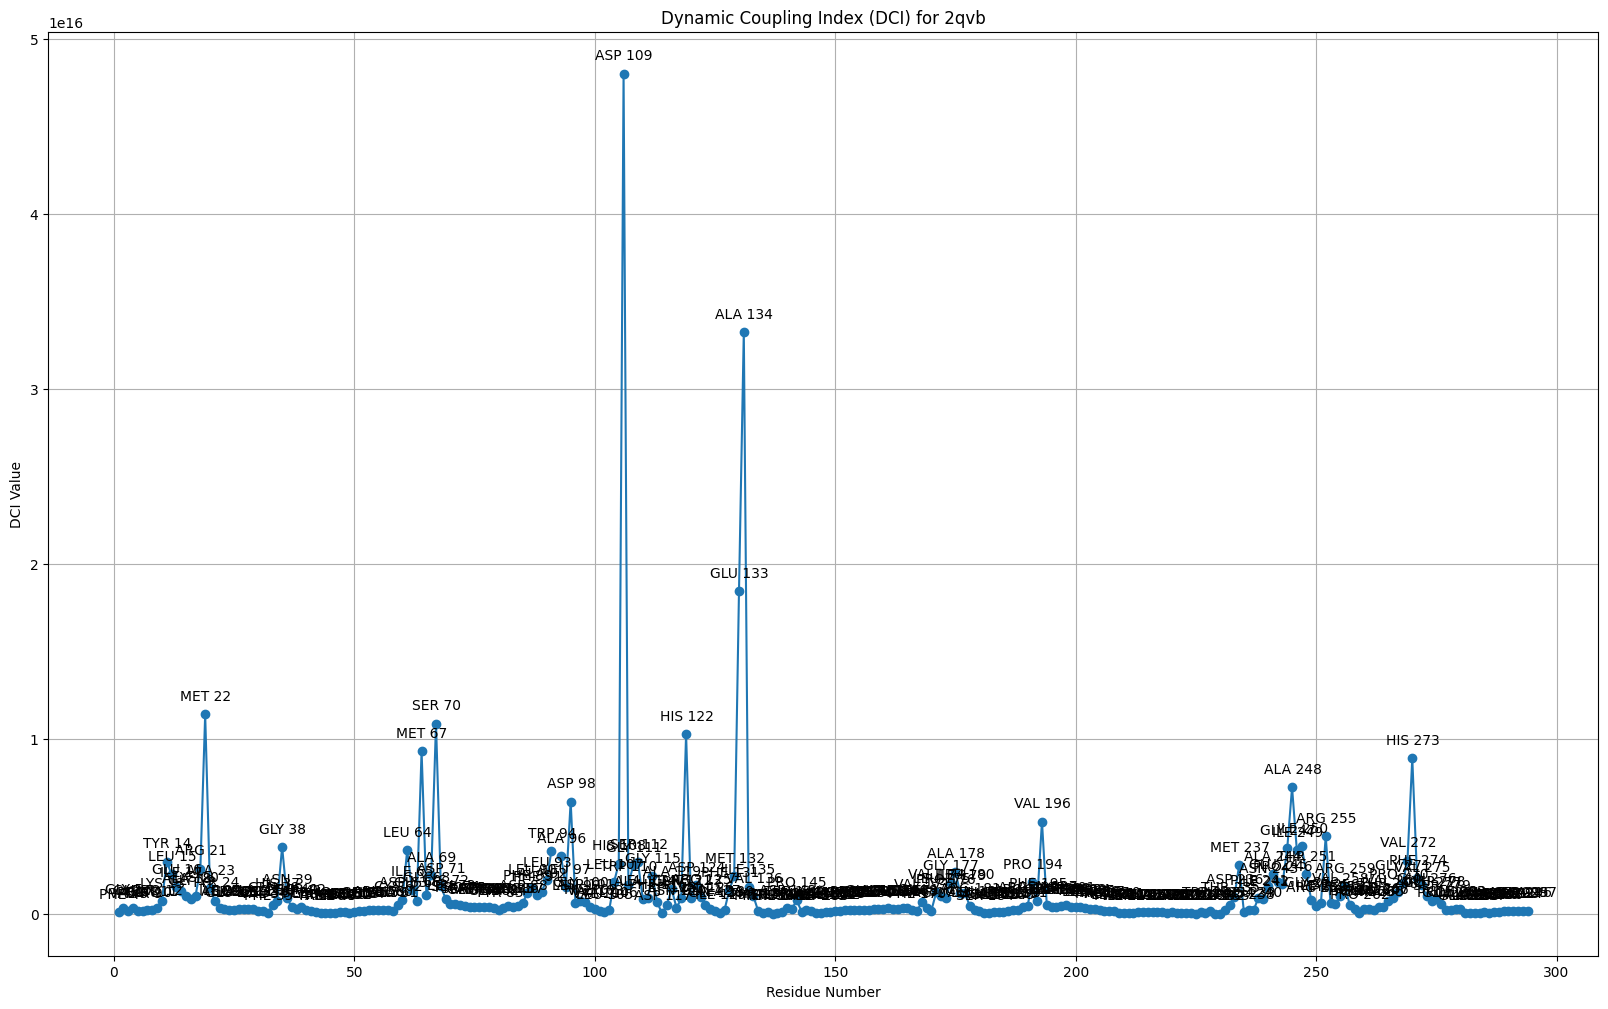

In [45]:
import numpy as np
import matplotlib.pyplot as plt


dci_values = np.load('dci.npy')




plt.figure(figsize=(20, 12))
plt.plot(residues, dci_values, marker='o')
plt.xlabel('Residue Number')
plt.ylabel('DCI Value')
plt.title('Dynamic Coupling Index (DCI) for 2qvb')
plt.grid(True)

for i, (name, number) in enumerate(resnames_and_nums):
    plt.annotate(f'{name} {number}', (number, dci_values[i]), textcoords="offset points", xytext=(-10,10), ha='center')

plt.show()

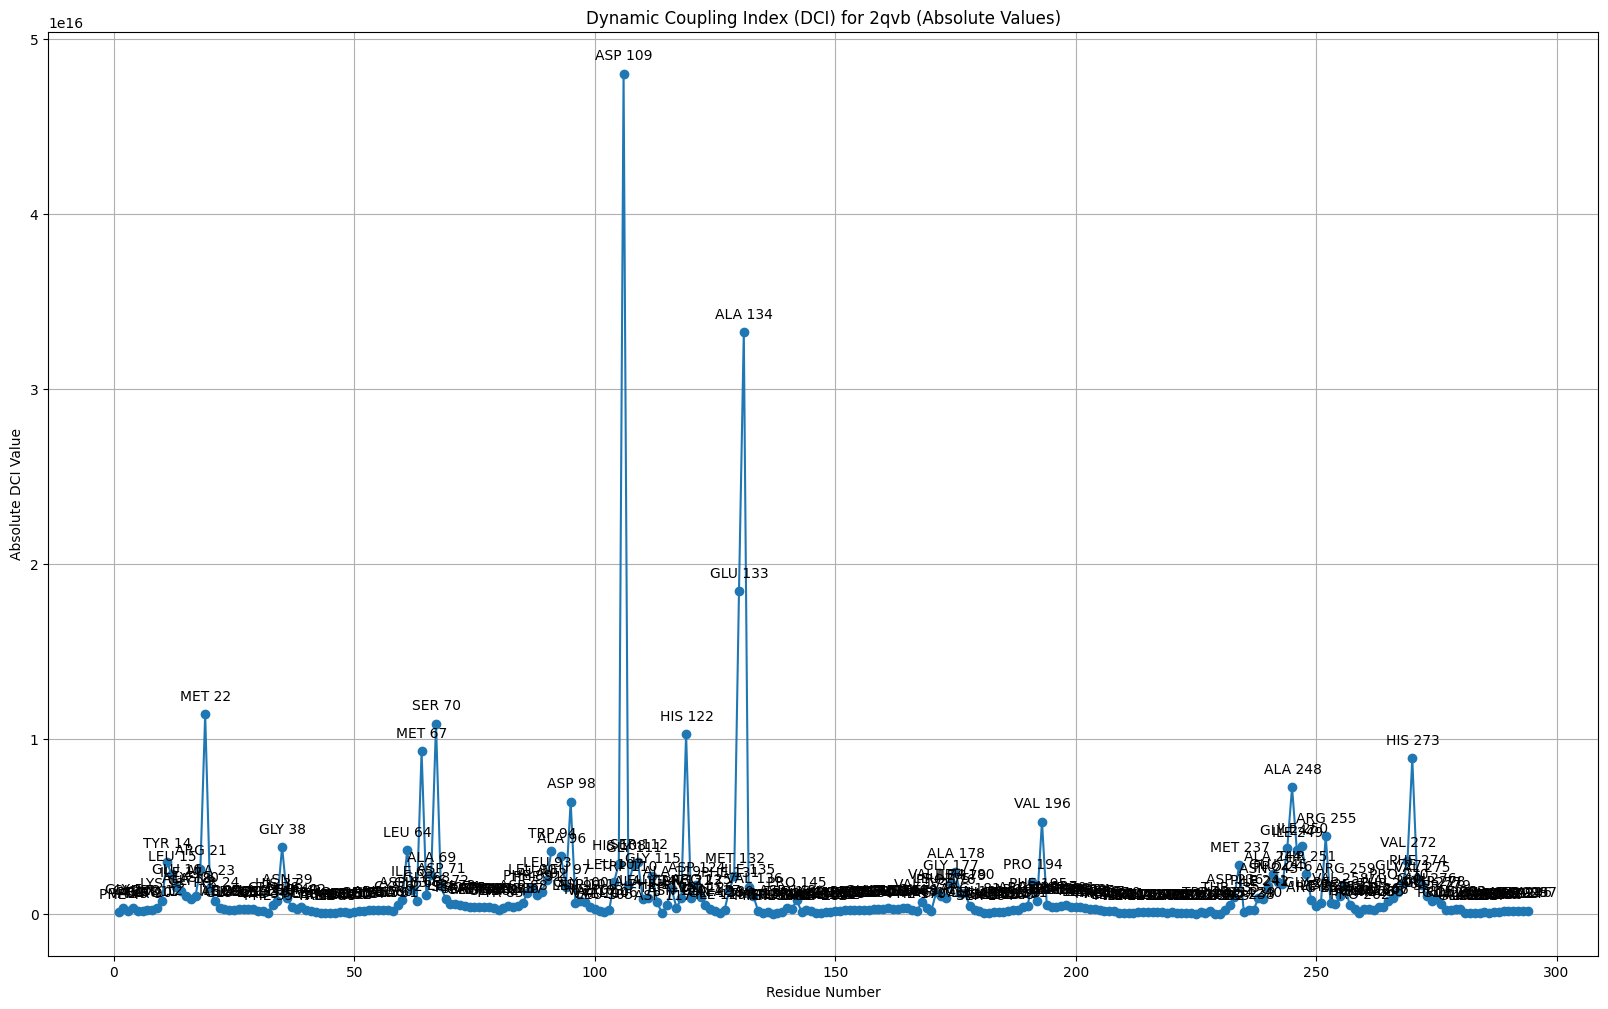

In [46]:
import numpy as np
import matplotlib.pyplot as plt


dci_values = np.load('dci.npy')




absolute_dci_values = np.absolute(dci_values)


plt.figure(figsize=(20, 12))
plt.plot(residues, absolute_dci_values, marker='o')  
plt.xlabel('Residue Number')
plt.ylabel('Absolute DCI Value')  
plt.title('Dynamic Coupling Index (DCI) for 2qvb (Absolute Values)')
plt.grid(True)


for i, (name, number) in enumerate(resnames_and_nums):
    plt.annotate(f'{name} {number}', (number, absolute_dci_values[i]), textcoords="offset points", xytext=(-10,10), ha='center')

plt.show()


In [47]:
writePDB('2qvb_dci273.pdb', DmbA_ca, beta=absolute_dci)

'2qvb_dci273.pdb'

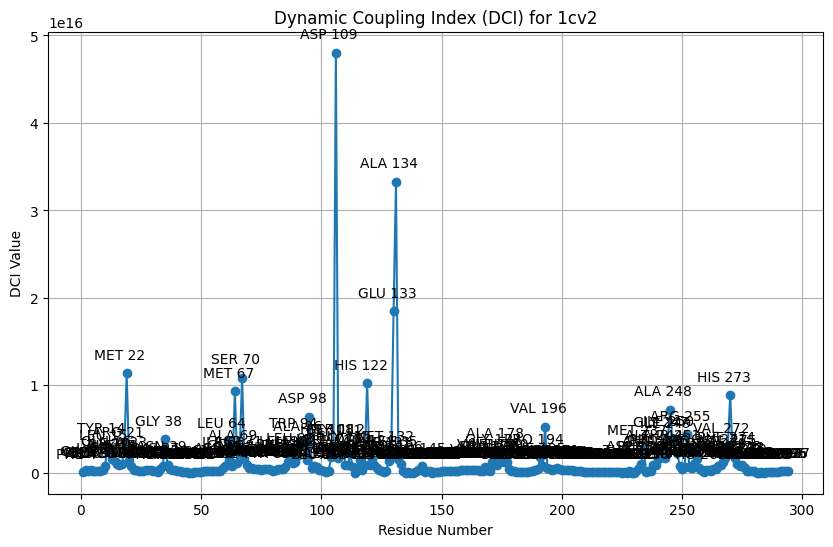

In [48]:
import numpy as np
import matplotlib.pyplot as plt


dci_values = np.load('dci.npy')



plt.figure(figsize=(10, 6))
plt.plot(residues, dci_values, marker='o')
plt.xlabel('Residue Number')
plt.ylabel('DCI Value')
plt.title('Dynamic Coupling Index (DCI) for 1cv2')
plt.grid(True)


for i, (name, number) in enumerate(resnames_and_nums):
    plt.annotate(f'{name} {number}', (number, dci_values[i]), textcoords="offset points", xytext=(-10,10), ha='center')

plt.show()



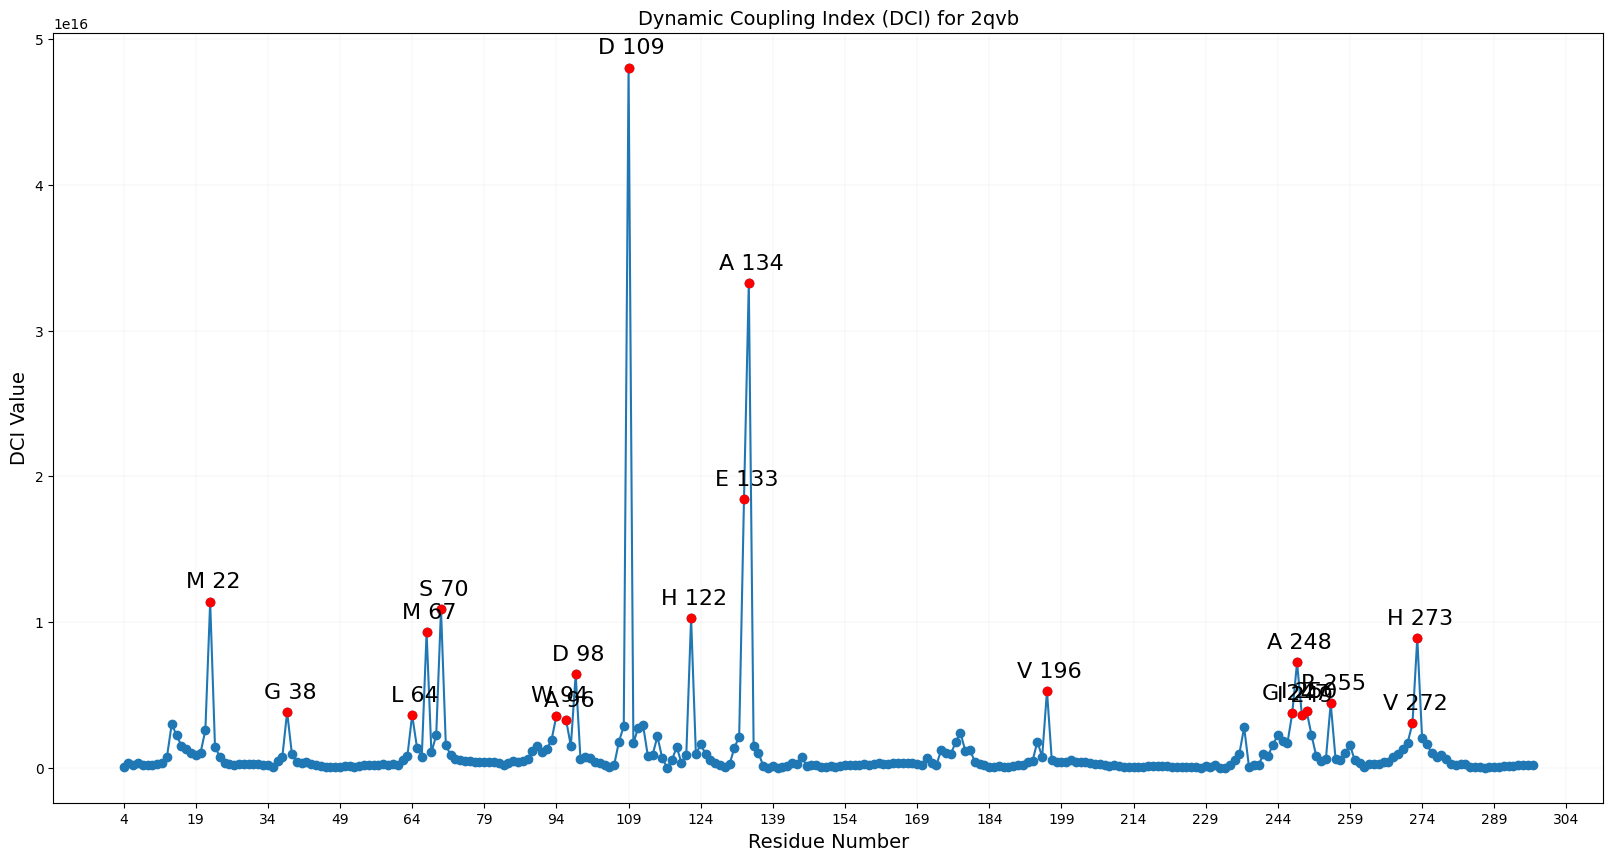

In [52]:
import matplotlib.pyplot as plt
import numpy as np


dci_values = np.load('dci.npy')

residue_mapping = {
    "ALA": "A",
    "CYS": "C",
    "ASP": "D",
    "GLU": "E",
    "PHE": "F",
    "GLY": "G",
    "HIS": "H",
    "ILE": "I",
    "LYS": "K",
    "LEU": "L",
    "MET": "M",
    "ASN": "N",
    "PRO": "P",
    "GLN": "Q",
    "ARG": "R",
    "SER": "S",
    "THR": "T",
    "VAL": "V",
    "TRP": "W",
    "TYR": "Y"
}

fig, ax = plt.subplots(figsize=(20,10), dpi=100)

x_values = np.arange(4, 4 + len(absolute_dci))

ax.plot(x_values, absolute_dci, marker='o', linestyle='-')

subset_color = 'red'

for i, value_tuple in enumerate(resnames_and_nums):
    if absolute_dci[i] > 0.3e16:
       
        value = value_tuple[0]
     
        one_letter_code = residue_mapping.get(value.upper(), "?")
      
        label = f"{one_letter_code} {i+4}"
        ax.annotate(label, (i+4, absolute_dci[i]), textcoords="offset points", xytext=(2,10), ha='center', fontsize=16)
        ax.plot(i+4, absolute_dci[i], marker='o', linestyle='', color=subset_color)


grid(b=True, which='both', axis='both', linewidth=0.08)
x = np.linspace(0, 10, 20)
plt.xticks(np.arange(min(x)+4, max(x)+300, 15))



ax.set_xlabel('Residue Number', fontsize=14)
ax.set_ylabel('DCI Value', fontsize=14)
ax.set_title('Dynamic Coupling Index (DCI) for 2qvb', fontsize=14)

plt.show()


